
# 나이브 베이즈를 이용한 스팸 분류



# PROBLEM STATEMENT

- 5,574개의 이메일 메시지가 있으며, 스팸인지 아닌지의 정보를 가지고 있다.
- 컬럼 : text, spam
- spam 컬럼의 값이 1이면 스팸이고, 0이면 스팸이 아닙니다.
- 스팸인지 아닌지 분류하는 인공지능을 만들자 - 수퍼바이즈드 러닝의 분류 문제!


# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/day11')

# STEP #1: IMPORT DATASET

emails.csv 읽기

In [5]:
spam_df =  pd.read_csv('emails.csv')

In [6]:
spam_df.head() 

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
spam_df['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [8]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
spam_df.isna().sum()

text    0
spam    0
dtype: int64

# STEP #2: VISUALIZE DATASET

## 스팸은 몇개이고, 아닌것은 몇개인지 확인하시오.

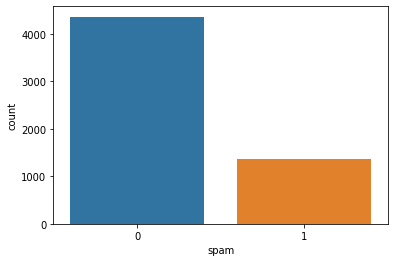

In [10]:
sns.countplot(data= spam_df, x = 'spam')
plt.show()

In [11]:
spam_df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

## 이메일의 길이가 스팸과 관련이 있는지 확인해 보려 합니다. 이메일의 문자 길이를 구해서, length 라는 컬럼을 만드세요. 

In [14]:
spam_df['length'] = spam_df.text.apply(len)



In [15]:
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


## 글자 길이를 히스토그램으로 나타내시오.

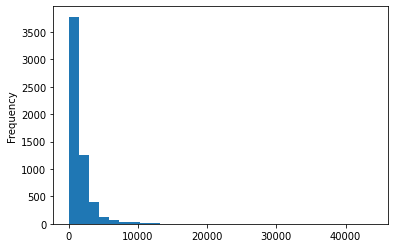

In [18]:
spam_df['length'].plot(kind='hist', bins = 30)
plt.show()

## 가장 긴 이메일을 찾아서 스팸인지 아닌지 확인하고, 이메일 내용을 확인하시오.

In [19]:
spam_df['length'].describe()

count     5728.000000
mean      1556.768680
std       2042.649812
min         13.000000
25%        508.750000
50%        979.000000
75%       1894.250000
max      43952.000000
Name: length, dtype: float64

In [20]:
spam_df.loc[  spam_df['length'] == spam_df['length'].max() ,    ]

,text,spam,length
2650,Subject: from the enron india newsdesk - april...,0,43952


In [24]:
spam_df.loc[  spam_df['length'] == spam_df['length'].max() ,  'text'  ].values[0]

'Subject: from the enron india newsdesk - april 27 th newsclips  fyi news articles from indian press .  - - - - - - - - - - - - - - - - - - - - - - forwarded by sandeep kohli / enron _ development on 04 / 27 / 2001 08 : 24 am - - - - - - - - - - - - - - - - - - - - - - - - - - -  nikita varma  04 / 27 / 2001 07 : 51 am  to : nikita varma / enron _ development @ enron _ development  cc : ( bcc : sandeep kohli / enron _ development )  subject : from the enron india newsdesk - april 27 th newsclips  friday apr 27 2001 , http : / / www . economictimes . com / today / cmo 3 . htm  dpc board empowers md to cancel mseb contract  friday apr 27 2001 , http : / / www . economictimes . com / today / 27 compl 1 . htm  mseb pays rs 134 cr under \' protest \' to dpc  friday , april 27 , 001 , http : / / www . businessstandard . com / today / economy 4 . asp ? menu = 3  enron india md authorised to terminate ppa  friday , april 27 , 2001 , http : / / www . financialexpress . com / fe 20010427 / topl 

## 0은 스팸이 아니고, 1은 스팸입니다. 파이차트를 통해, 스팸과 스팸이 아닌것이 몇 퍼센트인지, 소수점 1자리 까지만 보여주세요.

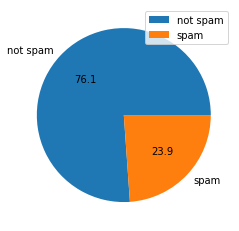

In [28]:
plt.pie( spam_df['spam'].value_counts() , autopct='%.1f' , labels=['not spam','spam']  )
plt.legend()
plt.show()

## 스팸이 아닌것은 ham 변수로, 스팸인것은 spam 변수로 저장하시오.

In [29]:
ham = spam_df.loc[  spam_df['spam'] == 0  ,    ]

In [30]:
spam = spam_df.loc[  spam_df['spam'] == 1  ,   ]

In [31]:
ham.head(3)

,text,spam,length
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0,1188
1369,Subject: sacramento weather station fyi - - ...,0,1997
1370,Subject: from the enron india newsdesk - jan 1...,0,7902


In [32]:
spam.head(3)

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448


In [ ]:
# 스팸의 이메일 길이를 히스토그램으로 나타내시오.


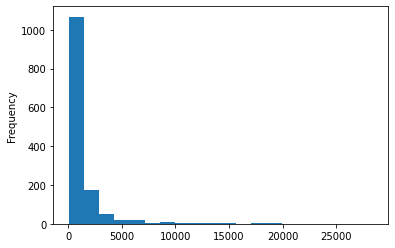

In [34]:
spam['length'].plot(kind = 'hist', bins = 20)
plt.show()

In [ ]:
# 햄의 이메일 길이를 히스토그램으로 나타내시오.

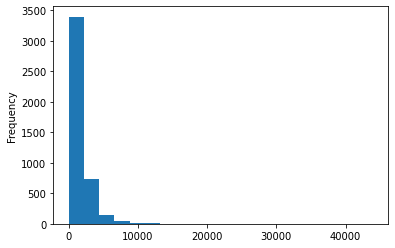

In [35]:
ham['length'].plot(kind = 'hist', bins = 20)
plt.show()

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# STEP 3.1 쉼표, 마침표 등의 구두점 제거하기

In [36]:
import string


In [37]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
test = 'Hello Mr. Future, I am aso happy to be learining AI now!!!~~'

### 위의 문장에서, 글자를 앞에서부터 하나씩 가져와서, 구두점인지 확인한 후, 구두점이 아닌 문자만 리스트로 저장하시오.

In [ ]:
# 결과 예시)   [ 'H', 'e', 'l', ...  'M', 'r', ' ','F' ... ]

In [40]:
Test_punc_removed = []
for char in test :
  if char not in string.punctuation :
    Test_punc_removed.append( char )


In [42]:
print(Test_punc_removed)

['H', 'e', 'l', 'l', 'o', ' ', 'M', 'r', ' ', 'F', 'u', 't', 'u', 'r', 'e', ' ', 'I', ' ', 'a', 'm', ' ', 'a', 's', 'o', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'l', 'e', 'a', 'r', 'i', 'n', 'i', 'n', 'g', ' ', 'A', 'I', ' ', 'n', 'o', 'w']


In [44]:

Test_punc_removed = [ char for char in test  if char not in string.punctuation ]


In [45]:
print(Test_punc_removed)

['H', 'e', 'l', 'l', 'o', ' ', 'M', 'r', ' ', 'F', 'u', 't', 'u', 'r', 'e', ' ', 'I', ' ', 'a', 'm', ' ', 'a', 's', 'o', ' ', 'h', 'a', 'p', 'p', 'y', ' ', 't', 'o', ' ', 'b', 'e', ' ', 'l', 'e', 'a', 'r', 'i', 'n', 'i', 'n', 'g', ' ', 'A', 'I', ' ', 'n', 'o', 'w']


### 위의 리스트에 있는 문자들을, 하나의 문자열로 만드시오.
### 결과 예시) 'Hello Mr Future ...'

In [48]:
'-'.join(Test_punc_removed)


'H-e-l-l-o- -M-r- -F-u-t-u-r-e- -I- -a-m- -a-s-o- -h-a-p-p-y- -t-o- -b-e- -l-e-a-r-i-n-i-n-g- -A-I- -n-o-w'

In [49]:
Test_punc_removed_join = ''.join(Test_punc_removed)

In [50]:
Test_punc_removed_join

'Hello Mr Future I am aso happy to be learining AI now'

In [51]:
test

'Hello Mr. Future, I am aso happy to be learining AI now!!!~~'

# STEP 3.2 STOPWORDS(불용어) 제거하기
### Stopwords (불용어) 란? - https://bit.ly/34Ipha2

In [52]:
import nltk

In [53]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [54]:
from nltk.corpus import stopwords

In [62]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords.words('french')

In [60]:
stop_list = stopwords.words('english')

### 구두점 제거한 문자열을, 이제 불용어 단어에 해당하지 않는 단어들만 모아서 리스트로 만드시오.
### 결과 예시) ['Hello', 'Mr', 'Future' ... ]

In [61]:
Test_punc_removed_join

'Hello Mr Future I am aso happy to be learining AI now'

In [63]:
Test_punc_removed_join.split()

['Hello',
 'Mr',
 'Future',
 'I',
 'am',
 'aso',
 'happy',
 'to',
 'be',
 'learining',
 'AI',
 'now']

In [65]:
Test_punc_removed_join_clean = []
for word in Test_punc_removed_join.split() : 
  if word not in stop_list :
    Test_punc_removed_join_clean.append( word  )

In [66]:
Test_punc_removed_join_clean

['Hello', 'Mr', 'Future', 'I', 'aso', 'happy', 'learining', 'AI']

In [ ]:
Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() if word not in stop_list ]

# STEP 3.3 COUNT VECTORIZER 

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
sample_data = ['This is the first document.', 'I loved them', 
               'This document is the second document', 
               'I am loving you',
               'And this is the third one.']


In [70]:
vectorizer = CountVectorizer()

In [72]:
X = vectorizer.fit_transform(sample_data)

In [76]:
print(vectorizer.get_feature_names())

['am', 'and', 'document', 'first', 'is', 'loved', 'loving', 'one', 'second', 'the', 'them', 'third', 'this', 'you']


In [74]:
len(vectorizer.get_feature_names())

14

In [75]:
X.toarray()

array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]])

# 이제, 우리의 데이터프레임에 있는, 이메일 내용을 Cleaning 한다.

In [77]:
# 1. 구두점 제거
# 2. 불용어 제거


In [82]:
def message_cleaning(message) :
  Test_punc_removed = [ char for char in message if char not in string.punctuation ]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [ word for word in Test_punc_removed_join.split() \
                                  if word.lower() not in stopwords.words('english') ]
  return Test_punc_removed_join_clean

In [83]:
message_cleaning("Hello~ my name is hehehe!! nice to meet you.")

['Hello', 'name', 'hehehe', 'nice', 'meet']

In [84]:
spam_df.head(3)

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448


In [ ]:
message_cleaning( spam_df['text'][0] )

In [86]:
spam_df['text'].apply( message_cleaning  )

0       [Subject, naturally, irresistible, corporate, ...
1       [Subject, stock, trading, gunslinger, fanny, m...
2       [Subject, unbelievable, new, homes, made, easy...
3       [Subject, 4, color, printing, special, request...
4       [Subject, money, get, software, cds, software,...
                              ...                        
5723    [Subject, research, development, charges, gpg,...
5724    [Subject, receipts, visit, jim, thanks, invita...
5725    [Subject, enron, case, study, update, wow, day...
5726    [Subject, interest, david, please, call, shirl...
5727    [Subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5728, dtype: object

# 이메일의 내용을 벡터라이징 한다.

In [87]:
vectorizer = CountVectorizer( analyzer= message_cleaning )

In [91]:
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [93]:
print(vectorizer.get_feature_names())

['\x01', '\x02', '\x03', '\x05', '\x06', '\x07', '\x08', '\x0f', '\x10', '\x12', '\x14', '\x15', '\x19', '0', '00', '000', '0000', '000000', '00000000', '0000000000', '000000000003619', '000000000003991', '000000000003997', '000000000005168', '000000000005409', '000000000005411', '000000000005412', '000000000005413', '000000000005820', '000000000006238', '000000000006452', '000000000007494', '000000000007498', '000000000007876', '000000000010552', '000000000011185', '000000000012677', '000000000012734', '000000000012735', '000000000012736', '000000000012738', '000000000012741', '000000000012987', '000000000013085', '000000000013287', '000000000015384', '000000000015793', '000000000023619', '000000000024099', '000000000025307', '000000000025312', '000010220', '0000102317', '0000102374', '0000102789', '0000104281', '0000104282', '0000104486', '0000104631', '0000104730', '0000104776', '0000104778', '0000107043', '0000108729', '000066', '0001', '000166', '0002', '000202', '0003', '0004', '

In [94]:
len(vectorizer.get_feature_names())

37229

In [95]:
spamham_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [96]:
spamham_countvectorizer.toarray().shape

(5728, 37229)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [97]:
from sklearn.naive_bayes import MultinomialNB

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
classifier = MultinomialNB()

In [100]:
classifier.fit( spamham_countvectorizer, spam_df['spam'].values  )

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### 다음 2개의 문장을 테스트 해보시오.


In [101]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]

In [102]:
testing1 = vectorizer.transform(testing_sample)

In [103]:
testing1.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [104]:
classifier.predict(testing1)

array([1, 0])

In [105]:
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [106]:
testing2 = vectorizer.transform(testing_sample)

In [107]:
testing2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
classifier.predict(testing2)

array([0, 1])

# STEP#4: Training셋과 Test셋으로 나눠서, 학습한다. 테스트셋은 20%로 한다. 

# STEP#5: 테스트셋으로 평가한다. 분류의 문제이므로 컨퓨전 매트릭스 확인. 

# WordCloud Visualizing - 스팸 이메일에는 어떤 단어들이 많이 들어있는지 Visualizing

[WordCloud 활용 예](https://t1.daumcdn.net/thumb/R720x0/?fname=http://t1.daumcdn.net/brunch/service/user/g7Y/image/QoUPiRwBMJoYAppVWNhMq4v8l-o)